# Quick Walkthrough

## Summary

In this code, we analyze single-cell RNA sequencing data from the PBMC dataset using various computational techniques. We start by performing PCA for dimensionality reduction and then apply the Leiden clustering algorithm to identify cell clusters. We visualize these clusters using UMAP embeddings. Next, we utilize a language model to annotate and describe the clusters, extracting key features and terms associated with each cluster. We also explore factor annotations based on principal components, generating visualizations like ridge plots and strip plots. Finally, we describe the biological processes related to specific gene sets, providing insights into the underlying biology of the identified clusters. Overall, we leverage machine learning and visualization tools to interpret complex single-cell data effectively.

We start by loading environment variables with `load_dotenv()`, which helps us manage sensitive information like API keys. Then, we import essential libraries: `scllm` for clustering and annotation, `scanpy` for single-cell analysis, and `langchain_openai` to interact with OpenAI's models. The `pprint` function is defined to display text in a Markdown format, making our outputs more readable in the notebook. This sets the stage for analyzing single-cell RNA-seq data using the PBMC dataset.

In [1]:
from dotenv import load_dotenv
load_dotenv()
import scllm as sl
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langchain_openai import ChatOpenAI

from IPython.display import display, Markdown, Latex

def pprint(text):
    display(Markdown(text))

## Set up

We set the OpenAI model to "gpt-4o-mini" and initialize the `ChatOpenAI` instance with a temperature of 0.0 for deterministic responses. Then, we load the PBMC dataset using `scanpy`, which gives us a processed single-cell RNA-seq dataset to work with. This dataset will be the foundation for our clustering and annotation tasks later in the script.

In [3]:
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)
pbmc = sc.datasets.pbmc3k_processed()

## Data preprocessing

We perform PCA on the PBMC dataset to reduce its dimensionality to 20 components, which helps in visualizing and analyzing the data more effectively. Then, we apply the Leiden clustering algorithm to identify clusters within the data, using the "igraph" flavor for better performance and setting the number of iterations to 2 for refinement. This sets the stage for further analysis and annotation of the identified clusters.

In [4]:
sc.pp.pca(pbmc, n_comps=20)
sc.tl.leiden(pbmc,  flavor="igraph", n_iterations=2)

In this part of the code, we visualize the UMAP embedding of our PBMC dataset, coloring the points based on the Leiden clustering results. This helps us see how well our clusters are separated in the reduced dimensional space, giving us insights into the structure of the data and the effectiveness of our clustering approach. It's a crucial step for interpreting the clustering results visually.

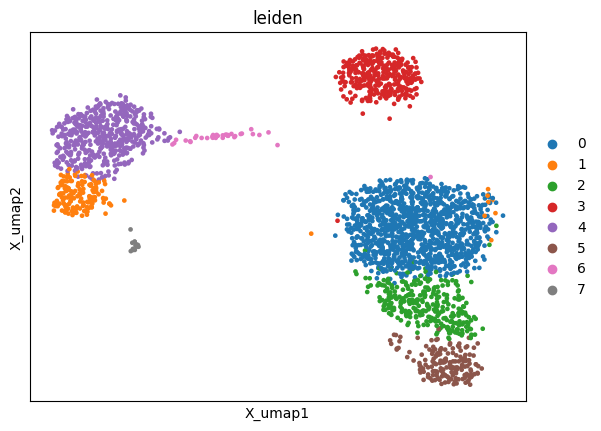

In [5]:
sc.pl.embedding(pbmc, basis='X_umap', color='leiden')

## Cluster annotation

In this part of the code, we use the `ClusterAnnotation` function from the `scllm` package to annotate clusters identified by the Leiden algorithm in our PBMC dataset. We specify the cluster key as 'leiden', set the number of top items to 30, and request 5 samples. By fitting this model with our dataset and the language model (`llm`), we generate meaningful annotations for each cluster, which we can later visualize and interpret.

In [ ]:
_ = sl.tl.ClusterAnnotation(cluster_key='leiden', top_items=30, num_samples=5).fit(pbmc, llm)

/Users/harald/Documents/opt/scllm/src/scllm/tl/utils.py:124: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  flattened=lambda df: df["union"].apply(


In this part of the code, `pbmc.uns['cluster_annotation']['mapping']` retrieves the cluster annotations we generated earlier using the `ClusterAnnotation` method. This mapping shows how the clusters identified in our PBMC dataset are labeled, helping us understand the biological significance of each cluster. Essentially, it gives us a clear view of what each cluster represents based on the top items we specified.

In [7]:
pbmc.uns['cluster_annotation']['mapping']

{'0': np.str_('T cells'),
 '1': np.str_('Monocyte/Macrophage'),
 '2': np.str_('CD8+ T cell'),
 '3': np.str_('B cell'),
 '4': np.str_('Monocyte/Macrophage'),
 '5': np.str_('Cytotoxic T Cell'),
 '6': np.str_('Monocyte/Macrophage'),
 '7': np.str_('Platelet')}

In this part of the code, we visualize the UMAP embedding of our PBMC dataset, coloring the points by the `cluster_annotation` we generated earlier. This helps us see how the different clusters are distributed in the reduced dimensional space, giving us insights into the relationships between the annotated clusters. It's a quick way to assess the clustering results visually.

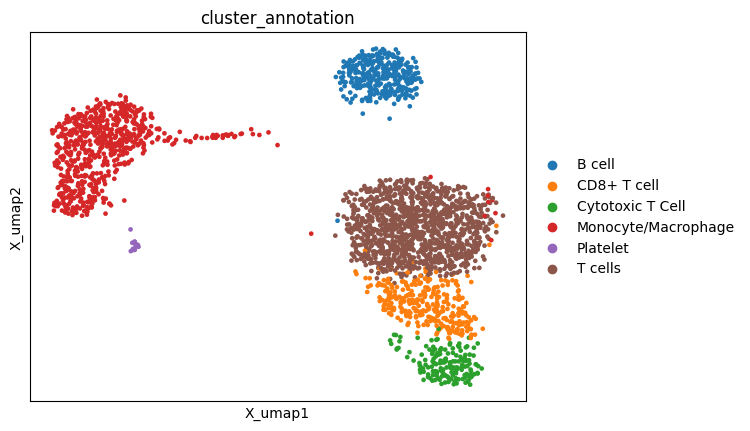

In [9]:
sc.pl.embedding(pbmc, basis='X_umap', color='cluster_annotation')

In this part of the code, we generate a heatmap to visualize the expression of features associated with each cluster identified by our previous clustering step (using the 'leiden' key). The `groupby` parameter organizes the data by the `cluster_annotation`, while `var_names` specifies the features we want to display from the cluster annotations. This helps us see how different clusters express various genes or features, giving insights into their biological significance.

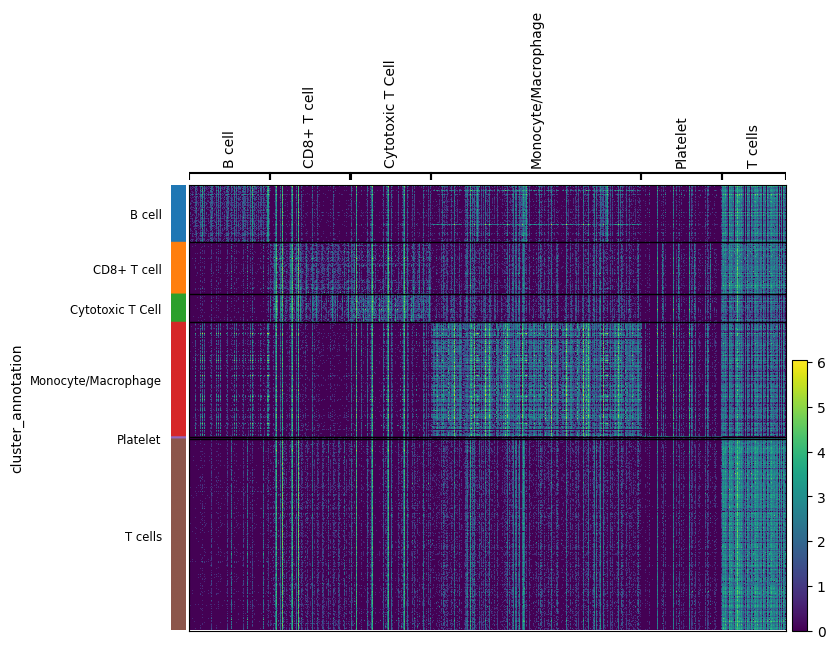

In [11]:
sc.pl.heatmap(pbmc, groupby='cluster_annotation', var_names=pbmc.uns['cluster_annotation']['features'])

## Cluster Descriptions

In this part of the code, we use the `ClusterDescription` function from the `scllm` package to analyze the clusters identified by the Leiden algorithm. By fitting it to our `pbmc` dataset with the language model `llm`, we generate descriptions for each cluster. This helps us understand the biological significance of the clusters based on the underlying gene expression data. The results will be stored in `pbmc.uns['cluster_description']` for further exploration.

In [ ]:
_ = sl.tl.ClusterDescription(cluster_key='leiden').fit(pbmc, llm)

In this part of the script, we display the `pbmc` object, which contains our processed single-cell RNA-seq data. This object holds all the results from previous analyses, including clustering and annotations. By showing `pbmc`, we can inspect the data structure and see the results of our clustering, annotations, and any additional analyses we've performed, like cluster descriptions and terms. It's a quick way to check our progress and the insights we've gained.

In [8]:
pbmc

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'leiden', 'leiden_colors', 'leiden_rank_genes_groups', 'cluster_description'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In this part of the script, we use `pprint` to display the cluster description for cluster '0' from our processed PBMC dataset. This mapping provides insights into the biological characteristics associated with this specific cluster, helping us understand its functional role. It’s a quick way to visualize the results of our clustering analysis and see what genes or pathways are enriched in this cluster.

In [13]:
pprint(pbmc.uns['cluster_description']['mapping']['0'])

The list of genes you provided includes a mix of ribosomal protein genes (RPS and RPL genes) and some immune-related genes (such as CD3D, CD3E, IL7R, and LTB). 

1. **Ribosomal Proteins (RPS and RPL)**: The presence of numerous ribosomal protein genes (RPS and RPL) suggests that the cells are likely to be actively translating proteins, which is characteristic of many cell types, particularly those that are rapidly proliferating or have high metabolic activity.

2. **Immune-Related Genes**: The genes CD3D and CD3E are part of the T-cell receptor complex, indicating that these cells are likely T lymphocytes. IL7R is also associated with T-cell development and function, and LTB is involved in lymphocyte trafficking and activation.

Given this combination of ribosomal proteins and immune-related genes, it is likely that the cell type represented by these genes is a **T lymphocyte** or a subset of T cells, such as CD4+ helper T cells or CD8+ cytotoxic T cells. The presence of MALAT1, a long non-coding RNA, is also often associated with various cell types, including immune cells, and can play roles in cell proliferation and differentiation.

In summary, the genes you provided are indicative of T lymphocytes, possibly reflecting a population of activated or proliferating T cells.

In this part of the code, we use `pprint` to display the cluster description for cluster '1' from our processed PBMC dataset. This mapping provides insights into the biological characteristics associated with that specific cluster, helping us understand its functional role. It’s a quick way to visualize and interpret the results of our clustering analysis.

In [14]:
pprint(pbmc.uns['cluster_description']['mapping']['1'])

The list of genes you provided is associated with immune and myeloid cell types, particularly those involved in inflammation and immune response. Here are some insights into the potential cell types these genes may refer to:

1. **Monocytes/Macrophages**: Many of the genes listed, such as **CD68**, **AIF1**, **TYROBP**, and **FCGR3A**, are markers commonly associated with monocytes and macrophages. These cells play crucial roles in the immune response, phagocytosis, and inflammation.

2. **Dendritic Cells**: Some genes like **HLA-DPA1** and **FCER1G** can also be associated with dendritic cells, which are important for antigen presentation and activation of T cells.

3. **Neutrophils**: While not directly indicated by the list, some genes like **S100A8**, **S100A9**, and **S100A11** (if included) are often associated with neutrophils, which are key players in the innate immune response.

4. **Natural Killer (NK) Cells**: The presence of **TYROBP** and **FCGR3A** suggests a potential association with NK cells, which are involved in the direct killing of infected or cancerous cells.

5. **T Cells**: Some genes like **IFITM2** and **IFITM3** can be involved in T cell responses, although they are not exclusive to T cells.

Overall, the combination of these genes suggests a focus on myeloid lineage cells, particularly macrophages and possibly dendritic cells, with some relevance to other immune cell types. The specific context of the study (e.g., tissue type, disease state) would further refine the identification of the cell type.

## Multiple terms

In this part of the code, we use the `ClusterTerms` function from the `scllm` package to analyze the clusters identified by the Leiden algorithm. By fitting it to our `pbmc` dataset with the language model `llm`, we extract key terms associated with each cluster. This helps us understand the biological significance of the clusters by identifying relevant molecular pathways or features that characterize them.

In [ ]:
_ = sl.tl.ClusterTerms('leiden').fit(pbmc, llm)

In this snippet, `pbmc.uns['cluster_terms']['mapping']['4']` retrieves the terms associated with cluster '4' from the cluster terms analysis we performed earlier. This helps us understand the biological significance of that specific cluster by showing which terms are most relevant. It’s part of our exploration of the data to interpret the clusters we identified using the Leiden algorithm.

In [16]:
pbmc.uns['cluster_terms']['mapping']['4']

['Immune response',
 'Inflammatory response',
 'Cellular response to stress',
 'Phagocytosis',
 'Iron ion homeostasis']

In this part of the script, we create a heatmap to visualize the expression of specific features associated with the clusters identified by the Leiden algorithm. We use the `sc.pl.heatmap` function, grouping the data by the 'leiden' clusters and selecting the features from `pbmc.uns['cluster_terms']['features']['0']`. This helps us see how different clusters express these features, providing insights into their biological significance.

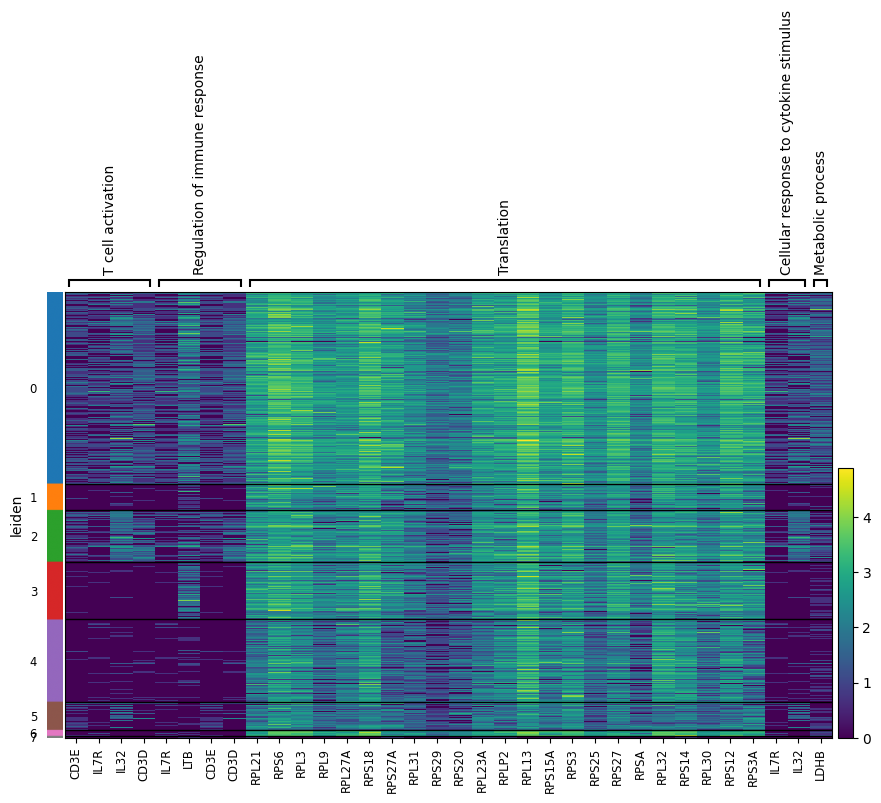

In [17]:
sc.pl.heatmap(pbmc, groupby='leiden', var_names=pbmc.uns['cluster_terms']['features']['0'])

In this snippet, we create a heatmap using the `scanpy` library to visualize gene expression patterns across clusters defined by the 'leiden' key. We specify `var_names` to pull in the features associated with the second set of cluster terms from our previous analysis. This helps us see how different genes are expressed in each cluster, giving insights into the biological significance of those clusters.

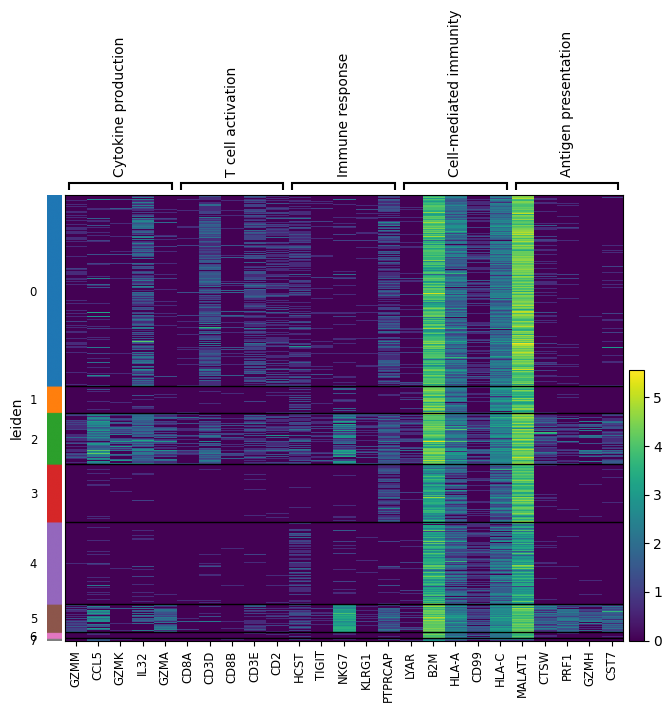

In [18]:
sc.pl.heatmap(pbmc, groupby='leiden', var_names=pbmc.uns['cluster_terms']['features']['2'])

## Factor annotation

In this part of the script, we use the `FactorAnnotation` function from the `scllm` package to annotate the principal components (PCs) of our PBMC dataset. By calling `.fit(pbmc, llm)`, we apply the model to our data, leveraging the language model (`llm`) to help interpret the factors associated with the PCs. This step is crucial for understanding the biological significance of the components we've computed earlier.

In [19]:
_ = sl.tl.FactorAnnotation(varm_key='PCs').fit(pbmc, llm)

/Users/harald/Documents/opt/scllm/src/scllm/tl/utils.py:124: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  flattened=lambda df: df["union"].apply(


### Plotting functions for `FactorAnnotation`

In this part of the code, we use `sl.pl.factor_ridge` to create a ridge plot for the PCA results stored in `pbmc`. We specify `obsm_key='X_pca'` to indicate we're using the PCA embeddings, and `annotation_key='factor_annotation'` to color the plot based on the factor annotations we generated earlier. The `factors=['0', '1', '2', '3']` argument tells it which factors to visualize, helping us understand their contributions to the data.

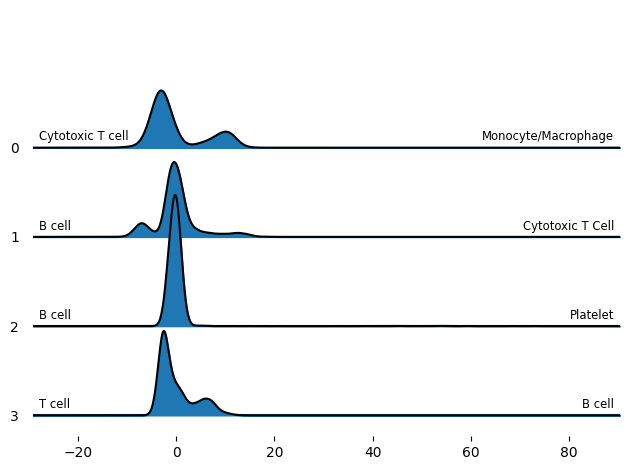

In [30]:
_ = sl.pl.factor_ridge(pbmc, obsm_key='X_pca', annotation_key='factor_annotation', factors=['0', '1', '2', '3'])

In this part of the code, we use `sl.pl.factor_stripplot` to visualize the relationship between the PCA factors (0, 1, 2, and 3) and the corresponding annotations. This plot helps us see how different clusters are represented across these factors, giving insights into the underlying biological processes. It’s a handy way to interpret the clustering results from our previous analyses.

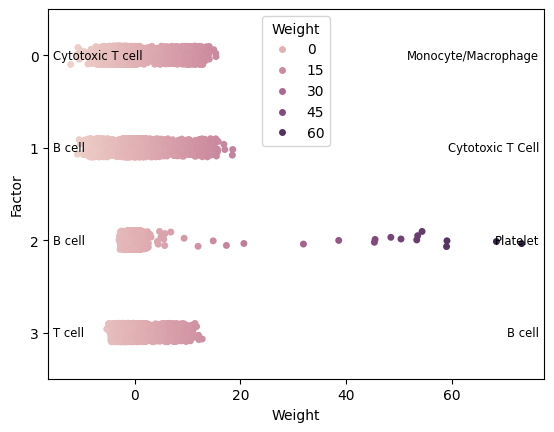

In [31]:
_ = sl.pl.factor_stripplot(pbmc, obsm_key='X_pca', annotation_key='factor_annotation', factors=['0', '1', '2', '3'])

In this part of the code, we use `sl.pl.factor_embedding` to visualize the PCA embeddings of our PBMC dataset, specifically focusing on the factors we've annotated (0, 1, 2, and 3). By setting `ncols=2`, we arrange the plots in two columns, making it easier to compare the different factor embeddings side by side. This helps us understand how these factors relate to the underlying cell populations in our analysis.

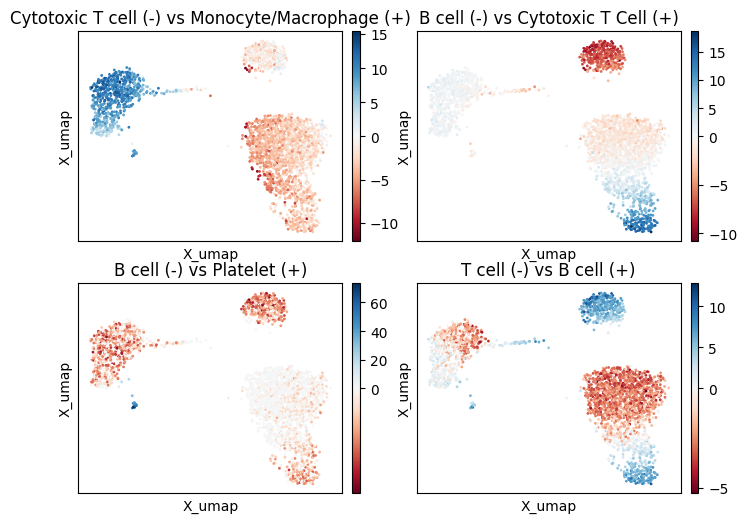

In [33]:
_ = sl.pl.factor_embedding(pbmc, obsm_key='X_pca', annotation_key='factor_annotation', factors=['0', '1', '2', '3'], ncols=2)

## Factor terms

In this snippet, we use the `FactorTerms` function from the `scllm` package to analyze the principal components (PCs) of our PBMC dataset. We specify factors '1', '2', and '3', asking for 10 terms related to 'molecular pathways' with a focus on the top 40 items. This helps us identify key biological pathways associated with these factors, enriching our understanding of the underlying biology in the clusters we've previously annotated.

In [34]:
_ = sl.tl.FactorTerms('PCs', factors=['1', '2', '3'], num_terms=10, top_items=40, term='molecular pathways').fit(pbmc, llm)

In this snippet, `pbmc.uns['factor_terms']['mapping']['1+']` retrieves the terms associated with the positive factor '1' from the factor terms analysis we performed earlier. This helps us understand which molecular pathways are enriched in this specific factor, providing insights into the biological processes linked to the clusters in our PBMC dataset. It's a key step in interpreting the results of our factor analysis.

In [42]:
pbmc.uns['factor_terms']['mapping']['1+']

['Cytotoxic T lymphocyte-mediated cytotoxicity',
 'Natural killer cell mediated cytotoxicity',
 'T cell receptor signaling pathway',
 'Cytokine-cytokine receptor interaction',
 'Chemokine signaling pathway',
 'Granulocyte adhesion and diapedesis',
 'Antigen processing and presentation',
 'Regulation of actin cytoskeleton',
 'Immune response',
 'Cellular response to cytokine stimulus']

In this snippet, `pbmc.uns['factor_terms']['mapping']['1-']` retrieves the terms associated with the negative factor of the first principal component (PC1) from our analysis. This helps us understand which molecular pathways are downregulated in that cluster. We use this information to interpret the biological significance of the factors we've identified in our single-cell RNA-seq data.

In [43]:
pbmc.uns['factor_terms']['mapping']['1-']

['B Cell Receptor Signaling Pathway',
 'Antigen Processing and Presentation',
 'T Cell Activation',
 'Cytokine Signaling in Immune system',
 'Class I MHC mediated antigen processing and presentation',
 'Class II MHC mediated antigen processing and presentation',
 'Regulation of B Cell Activation',
 'Immune Response',
 'Toll-like Receptor Signaling Pathway',
 'Phagosome']

## Factor descriptions

In this part of the script, we use the `FactorDescription` function from the `scllm` package to analyze the principal components (PCs) of our dataset. We specify factors '0', '1', and '2' to focus on, and we add an epilogue asking about the biological processes these gene sets might reflect. This helps us interpret the significance of the identified factors in the context of the biological data we’re working with.

In [45]:
_ = sl.tl.FactorDescription(
    'PCs', 
    factors=['0', '1', '2'],
    epilogue="What kind of biological process could this geneset reflect ?"
    ).fit(pbmc, llm)

In this part of the script, we use `pprint` to display the biological interpretation of a gene set associated with the factor '1+'. This output comes from the `ClusterDescription` analysis we performed earlier, which helps us understand the biological processes linked to specific clusters in our PBMC dataset. Essentially, we’re getting insights into what the genes in this cluster might be doing in a biological context.

In [46]:
pprint(pbmc.uns['factor_description']['mapping']['1+'])

The genes you've listed are primarily associated with immune responses, particularly those related to cytotoxic T cells and natural killer (NK) cells. Here's a breakdown of the biological processes that this gene set may reflect:

1. **Cytotoxicity**: Many of the genes, such as **GZMB** (Granzyme B), **PRF1** (Perforin), and **GZMA** (Granzyme A), are involved in the mechanisms of cytotoxicity. These genes are crucial for the ability of cytotoxic T cells and NK cells to induce apoptosis in target cells, such as virus-infected or tumor cells.

2. **Immune Response**: The presence of genes like **CCL4**, **CCL5**, and **XCL1/XCL2** indicates involvement in chemotaxis and recruitment of immune cells to sites of inflammation or infection. These chemokines play a role in the migration of T cells and other immune cells.

3. **Activation of Immune Cells**: Genes such as **CD247** (part of the T cell receptor complex) and **FCGR3A** (a receptor for IgG) suggest that this gene set is involved in the activation and signaling pathways of T cells and NK cells.

4. **Cytokine Production**: The gene **FGFBP2** and others may be involved in the production of cytokines and growth factors that modulate immune responses and tissue repair.

5. **Regulation of Immune Responses**: Some genes, like **ID2** and **HOPX**, are involved in the regulation of immune cell differentiation and function, indicating a role in maintaining immune homeostasis.

6. **Cellular Metabolism and Survival**: Genes like **AKR1C3** and **SAMD3** may be involved in metabolic processes that support the survival and function of immune cells under stress conditions.

Overall, this gene set likely reflects processes related to the activation, proliferation, and effector functions of cytotoxic lymphocytes, particularly in the context of immune responses to infections or tumors. It may also indicate a state of immune activation or inflammation.

In this snippet, we use `pprint` to display the biological interpretation of a gene set associated with the factor labeled '1-' from our PCA analysis. This output comes from the `ClusterDescription` step, where we asked the model to describe the biological processes linked to specific gene sets. It helps us understand the functional implications of the genes in that cluster, providing insights into their roles in biological pathways.

In [47]:
pprint(pbmc.uns['factor_description']['mapping']['1-'])

The genes you've listed are primarily associated with immune system functions, particularly those related to B cells and antigen presentation. Here's a breakdown of some key aspects:

1. **B Cell Development and Function**: 
   - **CD79A and CD79B**: These are components of the B cell receptor (BCR) complex, essential for B cell activation and signaling.
   - **MS4A1 (CD20)**: A marker for B cells, involved in B cell activation and proliferation.
   - **FCRLA**: Involved in the regulation of B cell receptor signaling and is important for B cell development.

2. **Antigen Presentation**:
   - **HLA genes (HLA-DQA1, HLA-DQB1, HLA-DRB1, HLA-DPB1, HLA-DMA, HLA-DMB, HLA-DOB, HLA-DPA1)**: These genes encode major histocompatibility complex (MHC) class II molecules, which are crucial for presenting antigens to CD4+ T cells. This is a key process in adaptive immunity.

3. **Signaling and Activation**:
   - **BLNK**: A signaling adaptor protein that plays a role in B cell receptor signaling.
   - **TCL1A**: Involved in the regulation of T and B cell activation and survival.
   - **IRF8**: A transcription factor that regulates immune responses and is important for the development of B cells and dendritic cells.

4. **Other Immune Functions**:
   - **LTB**: Involved in lymphocyte trafficking and the formation of secondary lymphoid organs.
   - **HVCN1**: A voltage-gated proton channel that plays a role in B cell activation and function.

5. **Cellular Processes**:
   - **EAF2**: Involved in various cellular processes, including apoptosis and cell cycle regulation, which can impact immune cell function.

Overall, this geneset reflects processes related to **B cell activation, differentiation, and antigen presentation**, indicating a focus on adaptive immune responses, particularly in the context of B cell biology. This could be relevant in studies of autoimmune diseases, B cell malignancies, or responses to infections and vaccinations.